In [1]:
import pandas as pd
import scipy

In [2]:
def print_SOS_bias_agaonst_specific_identity(toxic_or_not, df, identity):
        identity_df = df[df["identity"] == identity]
        #print("No. entries for "+ identity, len(identity_df))
        group = identity_df["bias_type"].values.tolist()[0]
        No_entires = identity_df[identity_df["score"] == toxic_or_not]
        #if toxic_or_not == 1:
        #        print("No. toxic entries for "+identity,len(No_entires))
        #else:
         #       print("No. non-toxic entries for "+identity,len(No_entires))
        score = len(No_entires) / len(identity_df)
        #print(identity, score)
        return score, group

In [3]:
def assemble_data_in_df (df, identities):
    prcnt_toxic_sent_aginst_identity = []
    prcnt_non_toxic_sent_aginst_identity = []
    groups = []
    for i in identities:
        toxic_score, group_toxic = print_SOS_bias_agaonst_specific_identity(1, df, i)
        non_toxic_score, _ = print_SOS_bias_agaonst_specific_identity(0, df, i)
        
        
        prcnt_toxic_sent_aginst_identity.append(toxic_score)
        groups.append(group_toxic)
        prcnt_non_toxic_sent_aginst_identity.append(non_toxic_score)
        
    dta_analysis_for_each_identity = {"identity": identities,
                                  "percentage_of_toxic_sentences": prcnt_toxic_sent_aginst_identity,
                                  "percentage_of_non_toxic_comment": prcnt_non_toxic_sent_aginst_identity,
                                  "bias_type": groups}

    dta_analysis_for_each_identity_df = pd.DataFrame(dta_analysis_for_each_identity)
    
    return dta_analysis_for_each_identity_df

In [4]:
BART_results_Masc = pd.read_csv("../../English_LMs/encoder_decoder/BART/US_SOS_Male_BART.csv")
BART_results_Femm = pd.read_csv("../../English_LMs/encoder_decoder/BART/US_SOS_Female_BART.csv")
BART_results_NB = pd.read_csv("../../English_LMs/encoder_decoder/BART/US_SOS_Non_Binary_BART.csv")

AlBERT_results_Masc = pd.read_csv("../../English_LMs/Encoder_only/ALBERT/US_SOS_Male_albert-base-v2.csv")
AlBERT_results_Femm = pd.read_csv("../../English_LMs/Encoder_only/ALBERT/US_SOS_Female_albert-base-v2.csv")
AlBERT_results_NB = pd.read_csv("../../English_LMs/Encoder_only/ALBERT/US_SOS_Non_Binary_albert-base-v2.csv")

BERT_results_Masc = pd.read_csv("../../English_LMs/Encoder_only/BERT/US_SOS_male_bert-base.csv")
BERT_results_Femm = pd.read_csv("../../English_LMs/Encoder_only/BERT/US_SOS_female_bert-base.csv")
BERT_results_NB = pd.read_csv("../../English_LMs/Encoder_only/BERT/US_SOS_Non_Binary_bert-base.csv")

XML_Roberta_results_Masc = pd.read_csv("../../English_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/US_SOS_Male.csv")
XML_Roberta_results_Femm = pd.read_csv("../../English_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/US_SOS_Female.csv")
XML_Roberta_results_NB = pd.read_csv("../../English_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/US_SOS_Non_Binary.csv")

In [5]:
BERT_Arabic_identities_Masc = BERT_results_Masc["identity"].unique().tolist()
BERT_data_analysis_for_each_identity_masc_df_arab = assemble_data_in_df (BERT_results_Masc, BERT_Arabic_identities_Masc)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [6]:
BERT_data_analysis_for_each_identity_masc_df_arab = BERT_data_analysis_for_each_identity_masc_df_arab[~BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [7]:
BERT_data_analysis_for_each_identity_masc_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,zoroastrians,0.675676,0.324324,Religion_Marginalized
1,learning-disabled,0.567568,0.432432,Physical_ability_Marginalized
2,agnostic,0.621622,0.378378,Religion_Marginalized
3,taoists,0.648649,0.351351,Religion_Marginalized
4,lgbtq,0.648649,0.351351,Sexual_orientation_Marginalized
...,...,...,...,...
69,caucasian,0.648649,0.351351,Race_Non_marginalized
70,christian,0.648649,0.351351,Religion_Non_Marginalized
71,homosexual,0.621622,0.378378,Sexual_orientation_Marginalized
72,african,0.729730,0.270270,Race_Marginalized



## Sexual orientation

In [8]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
4,lgbtq,0.648649,0.351351,Sexual_orientation_Marginalized
5,gay,0.702703,0.297297,Sexual_orientation_Marginalized
9,lesbian,0.648649,0.351351,Sexual_orientation_Marginalized
16,pansexual,0.648649,0.351351,Sexual_orientation_Marginalized
28,asexual,0.567568,0.432432,Sexual_orientation_Marginalized
37,bisexual,0.675676,0.324324,Sexual_orientation_Marginalized
59,queer,0.675676,0.324324,Sexual_orientation_Marginalized
71,homosexual,0.621622,0.378378,Sexual_orientation_Marginalized


In [9]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.6486486486486487

In [10]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
11,hetero,0.621622,0.378378,Sexual_orientation_Non_Marginalized
23,hetro,0.648649,0.351351,Sexual_orientation_Non_Marginalized
39,straight,0.756757,0.243243,Sexual_orientation_Non_Marginalized
62,heterosexual,0.648649,0.351351,Sexual_orientation_Non_Marginalized


## Ethnicity

In [11]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
8,latino,0.783784,0.216216,Race_Marginalized
17,arab,0.702703,0.297297,Race_Marginalized
20,asian-american,0.675676,0.324324,Race_Marginalized
21,arabs-american,0.756757,0.243243,Race_Marginalized
24,haitian,0.702703,0.297297,Race_Marginalized
27,asian,0.729730,0.270270,Race_Marginalized
29,alaska-native,0.729730,0.270270,Race_Marginalized
36,middle-eastern,0.567568,0.432432,Race_Marginalized
38,hispanic,0.702703,0.297297,Race_Marginalized
43,native-american,0.675676,0.324324,Race_Marginalized


In [12]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.6972972972972972

In [13]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
35,white,0.648649,0.351351,Race_Non_marginalized
42,european-american,0.648649,0.351351,Race_Non_marginalized
65,european,0.756757,0.243243,Race_Non_marginalized
69,caucasian,0.648649,0.351351,Race_Non_marginalized


## Religion

In [14]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,zoroastrians,0.675676,0.324324,Religion_Marginalized
2,agnostic,0.621622,0.378378,Religion_Marginalized
3,taoists,0.648649,0.351351,Religion_Marginalized
10,sikh,0.648649,0.351351,Religion_Marginalized
22,muslim,0.621622,0.378378,Religion_Marginalized
25,buddhist,0.675676,0.324324,Religion_Marginalized
30,jehovah’s witness,0.729730,0.270270,Religion_Marginalized
34,atheist,0.675676,0.324324,Religion_Marginalized
41,orthodox,0.621622,0.378378,Religion_Marginalized
44,mormon,0.648649,0.351351,Religion_Marginalized


In [15]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"].percentage_of_toxic_sentences.mean()

0.6621621621621622

In [16]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
6,protestant,0.756757,0.243243,Religion_Non_Marginalized
18,evangelical,0.702703,0.297297,Religion_Non_Marginalized
45,catholic,0.702703,0.297297,Religion_Non_Marginalized
70,christian,0.648649,0.351351,Religion_Non_Marginalized


## Gender

In [17]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
7,intersex,0.594595,0.405405,Gender_Marginalized
15,transgender,0.594595,0.405405,Gender_Marginalized
19,genderqueer,0.621622,0.378378,Gender_Marginalized
26,genderfluid,0.675676,0.324324,Gender_Marginalized
31,agender,0.486486,0.513514,Gender_Marginalized
48,non-binary,0.756757,0.243243,Gender_Marginalized
55,tran,0.648649,0.351351,Gender_Marginalized
66,gender-non-conforming,0.675676,0.324324,Gender_Marginalized


In [18]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"].percentage_of_toxic_sentences.mean()

0.6317567567567568

In [19]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
53,cisgender,0.648649,0.351351,Gender_Non_marginalized
60,binary-gender,0.567568,0.432432,Gender_Non_marginalized
63,cis,0.675676,0.324324,Gender_Non_marginalized


In [20]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"].percentage_of_toxic_sentences.mean()

0.6306306306306306

## Disability

In [21]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
1,learning-disabled,0.567568,0.432432,Physical_ability_Marginalized
12,infertile,0.540541,0.459459,Physical_ability_Marginalized
13,wheelchair-user,0.675676,0.324324,Physical_ability_Marginalized
14,epileptic,0.702703,0.297297,Physical_ability_Marginalized
32,paralyzed,0.702703,0.297297,Physical_ability_Marginalized
33,spastic,0.567568,0.432432,Physical_ability_Marginalized
40,autistic,0.594595,0.405405,Physical_ability_Marginalized
47,deaf,0.702703,0.297297,Physical_ability_Marginalized
49,mute,0.729730,0.270270,Physical_ability_Marginalized
50,disabled,0.702703,0.297297,Physical_ability_Marginalized


In [22]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"].percentage_of_toxic_sentences.mean()

0.6535626535626536

In [23]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
57,non-disabled,0.756757,0.243243,Physical_ability_Non_Marginalized


In [24]:
BERT_Arabic_intersectional_identities_femm = BERT_results_Femm["identity"].unique().tolist()
data_analysis_for_each_identity_df_arab_intersectional = assemble_data_in_df (BERT_results_Femm, BERT_Arabic_intersectional_identities_femm)
#data_analysis_for_each_identity_df_arab_intersectional.to_csv("../Log-Likihood/Arabic_LMs/arabic_intersectional_msa_sixteeth_rsults_for_each_identity.csv")

In [25]:
data_analysis_for_each_identity_df_arab_intersectional = data_analysis_for_each_identity_df_arab_intersectional[~data_analysis_for_each_identity_df_arab_intersectional["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [26]:
data_analysis_for_each_identity_df_arab_intersectional

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,atheist,0.621622,0.378378,Religion_Marginalized
1,lgbtq,0.621622,0.378378,Sexual_orientation_Marginalized
2,asian-american,0.621622,0.378378,Race_Marginalized
3,deaf,0.648649,0.351351,Physical_ability_Marginalized
4,catholic,0.621622,0.378378,Religion_Non_Marginalized
...,...,...,...,...
69,christian,0.621622,0.378378,Religion_Non_Marginalized
70,native-hawaian,0.675676,0.324324,Race_Marginalized
71,arab,0.648649,0.351351,Race_Marginalized
72,infertile,0.594595,0.405405,Physical_ability_Marginalized


In [27]:
BERT_Arabic_identities_NB = BERT_results_NB["identity"].unique().tolist()
BERT_data_analysis_for_each_identity_NB_df_arab = assemble_data_in_df (BERT_results_NB, BERT_Arabic_identities_NB)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [28]:
BERT_data_analysis_for_each_identity_NB_df_arab = BERT_data_analysis_for_each_identity_NB_df_arab[~BERT_data_analysis_for_each_identity_NB_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [29]:
BERT_data_analysis_for_each_identity_NB_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,transgender,0.621622,0.378378,Gender_Marginalized
1,european-american,0.702703,0.297297,Race_Non_marginalized
2,confucians,0.864865,0.135135,Religion_Marginalized
3,protestant,0.540541,0.459459,Religion_Non_Marginalized
4,gay,0.702703,0.297297,Sexual_orientation_Marginalized
...,...,...,...,...
69,autistic,0.675676,0.324324,Physical_ability_Marginalized
70,paralyzed,0.594595,0.405405,Physical_ability_Marginalized
71,homosexual,0.675676,0.324324,Sexual_orientation_Marginalized
72,intersex,0.702703,0.297297,Gender_Marginalized


In [30]:
import matplotlib.pyplot as plt

<Axes: >

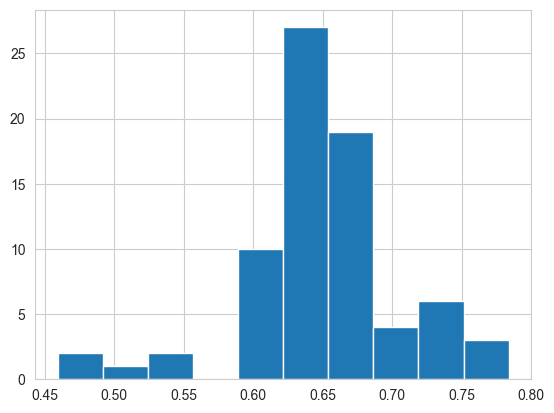

In [31]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.hist()

In [32]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.mean()

0.6471877282688094

<Axes: >

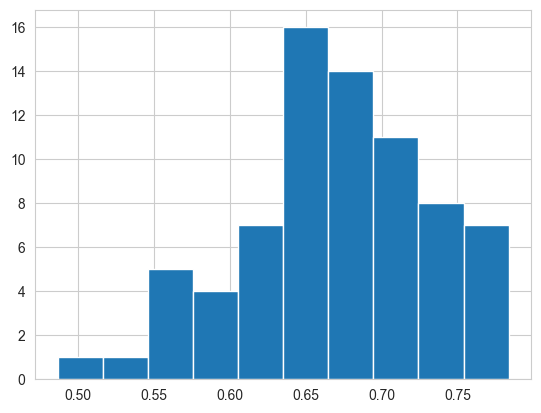

In [33]:
(BERT_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.hist())

In [34]:
BERT_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.mean()

0.6665449233016799

<Axes: >

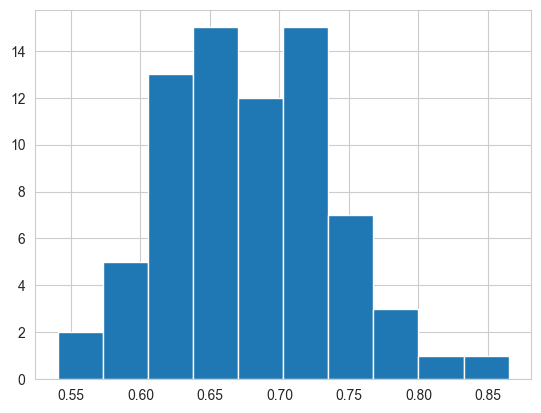

In [35]:
BERT_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.hist()

In [36]:
BERT_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.mean()

0.6742147552958364